In [3]:
from src.mtal.analysis import compute_rsi, get_best_valid_line

from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs

MAX_HORIZON = 20
cryptos = get_spot_pairs()

# df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
df = compute_rsi(df)
df = df.with_row_index()

current_max_gain = 0
entry_price = 0
entry_i = 0
# current_delta_time_to_max = 0

max_gains = []
# delta_time_to_max = []

for i in range(len(df)):
    current_df = df[:i]

    setup_ok = get_best_valid_line([], "BTCUSDT", current_df, 100)

    if entry_price == 0 and setup_ok:
        entry_date = current_df[-1, "Close Time"]
        print(f"Entry {entry_date}")
        entry_price = df[i, "Close"]
        entry_i = i
    elif entry_price > 0:
        current_gain = (df[i, "Close"] - entry_price) / entry_price
        current_duration = i - entry_i

        current_max_gain = max(current_gain, current_max_gain)

        if current_duration > MAX_HORIZON:
            exit_date = current_df[-1, "Close Time"]
            print(f"Exit {exit_date}")
            max_gains.append(current_max_gain)
            entry_price = 0
            entry_i = 0
            current_max_gain = 0

print(max_gains)



Entry 2022-01-12 23:59:59.999000
Exit 2022-02-02 23:59:59.999000
Entry 2022-02-03 23:59:59.999000
Exit 2022-02-24 23:59:59.999000
Entry 2022-03-01 23:59:59.999000
Exit 2022-03-22 23:59:59.999000
Entry 2022-03-24 23:59:59.999000
Exit 2022-04-14 23:59:59.999000
Entry 2022-04-18 23:59:59.999000
Exit 2022-05-09 23:59:59.999000
Entry 2022-05-19 23:59:59.999000
Exit 2022-06-09 23:59:59.999000
Entry 2022-07-04 23:59:59.999000
Exit 2022-07-25 23:59:59.999000
Entry 2022-08-08 23:59:59.999000
Exit 2022-08-29 23:59:59.999000
Entry 2022-09-04 23:59:59.999000
Exit 2022-09-25 23:59:59.999000
Entry 2022-09-28 23:59:59.999000
Exit 2022-10-19 23:59:59.999000
Entry 2022-10-23 23:59:59.999000
Exit 2022-11-13 23:59:59.999000
Entry 2022-11-23 23:59:59.999000
Exit 2022-12-14 23:59:59.999000
Entry 2022-12-15 23:59:59.999000
Exit 2023-01-05 23:59:59.999000
Entry 2023-01-06 23:59:59.999000
Exit 2023-01-27 23:59:59.999000
Entry 2023-01-29 23:59:59.999000
Exit 2023-02-19 23:59:59.999000
Entry 2023-03-13 23:59:59

In [7]:
df

index,Open Time,Open,High,Low,Close,Volume,Close Time,Change,Gain,Loss,Avg Gain,Avg Loss,RS,ema5,RSI,Volume_MA
u32,datetime[ms],f64,f64,f64,f64,f64,datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64
0,2017-08-14 00:00:00,4261.48,4485.39,3850.0,4086.29,2843.431426,2017-08-20 23:59:59.999,null,null,null,null,null,null,4086.29,null,null
1,2017-08-21 00:00:00,4069.13,4453.91,3400.0,4310.01,4599.396629,2017-08-27 23:59:59.999,223.72,223.72,-0.0,223.72,-0.0,-inf,4160.863333,100.0,null
2,2017-08-28 00:00:00,4310.01,4939.19,4124.54,4509.08,4753.843376,2017-09-03 23:59:59.999,199.07,199.07,-0.0,221.959286,-0.0,-inf,4276.935556,100.0,null
3,2017-09-04 00:00:00,4505.0,4788.59,3603.0,4130.37,6382.787745,2017-09-10 23:59:59.999,-378.71,0.0,378.71,206.105051,27.050714,7.619209,4228.08037,88.398008,null
4,2017-09-11 00:00:00,4153.62,4394.59,2817.0,3699.99,8106.705127,2017-09-17 23:59:59.999,-430.38,0.0,430.38,191.383262,55.859949,3.426127,4052.050247,77.406883,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
351,2024-05-06 00:00:00,64012.0,65500.0,60187.12,61483.99,179712.75232,2024-05-12 23:59:59.999,-2528.01,0.0,2528.01,1424.712303,852.944181,1.670346,63662.303708,62.551676,307063.973604
352,2024-05-13 00:00:00,61484.0,67700.0,60749.21,66274.01,195247.04901,2024-05-19 23:59:59.999,4790.02,4790.02,-0.0,1665.091424,792.019597,2.102336,64532.872472,67.766227,305403.19094
353,2024-05-20 00:00:00,66274.0,71979.0,66060.31,68507.67,220708.83749,2024-05-26 23:59:59.999,2233.66,2233.66,-0.0,1705.703465,735.446768,2.319275,65857.804981,69.872941,300914.258504


[]
Line(x_1=0, x_2=0, y_1=0, y_2=0, score=0, a=0, b=0)


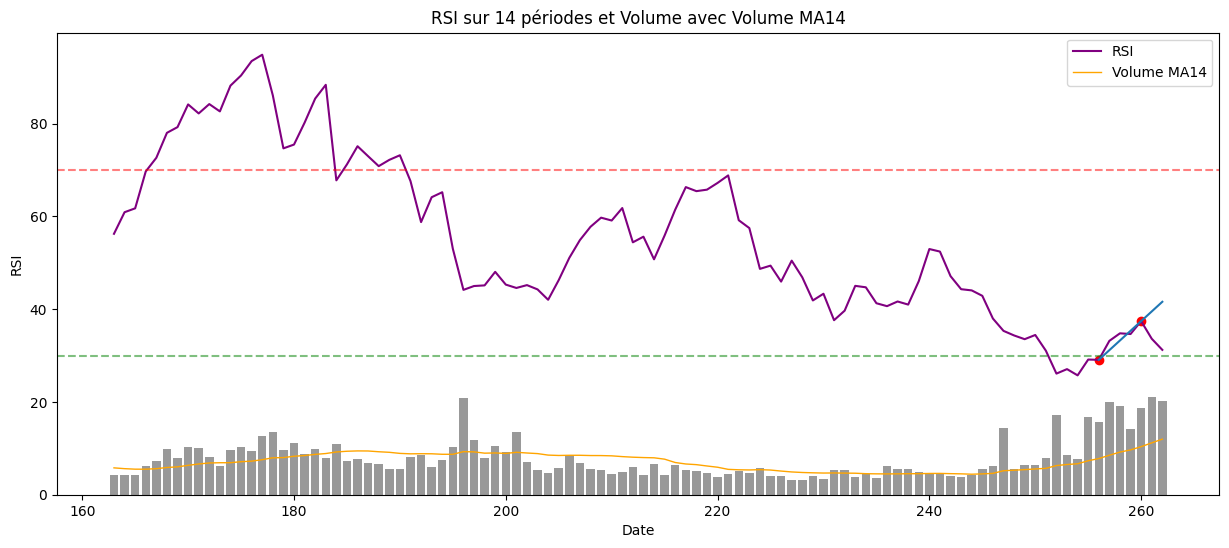

shape: (263, 17)
┌───────┬─────────────┬──────────┬──────────┬───┬──────────┬─────────────┬───────────┬─────────────┐
│ index ┆ Open Time   ┆ Open     ┆ High     ┆ … ┆ RS       ┆ ema5        ┆ RSI       ┆ Volume_MA   │
│ ---   ┆ ---         ┆ ---      ┆ ---      ┆   ┆ ---      ┆ ---         ┆ ---       ┆ ---         │
│ u32   ┆ datetime[ms ┆ f64      ┆ f64      ┆   ┆ f64      ┆ f64         ┆ f64       ┆ f64         │
│       ┆ ]           ┆          ┆          ┆   ┆          ┆             ┆           ┆             │
╞═══════╪═════════════╪══════════╪══════════╪═══╪══════════╪═════════════╪═══════════╪═════════════╡
│ 0     ┆ 2017-08-14  ┆ 4261.48  ┆ 4485.39  ┆ … ┆ null     ┆ 4086.29     ┆ null      ┆ null        │
│       ┆ 00:00:00    ┆          ┆          ┆   ┆          ┆             ┆           ┆             │
│ 1     ┆ 2017-08-21  ┆ 4069.13  ┆ 4453.91  ┆ … ┆ -inf     ┆ 4160.863333 ┆ 100.0     ┆ null        │
│       ┆ 00:00:00    ┆          ┆          ┆   ┆          ┆             ┆

In [1]:
import polars as pl
from src.mtal.dataviz import get_x_y_from_df, plot_rsi_with_line
from src.mtal.analysis import is_valid_magic_line, compute_rsi, get_best_valid_line
from src.mtal.data_collect import get_pair_df

df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1w")
df = compute_rsi(df)
df = df.with_row_index()
df = df[:-93]
x_1, x_2, y_1, y_2 = get_x_y_from_df(df, 3, 7)


# print(get_best_valid_line([], "BTCUSDT", df, 100))
best_line = []
get_best_valid_line(best_line, "BTCUSDT", df, 100)

if best_line:
    x_1, x_2, y_1, y_2 = best_line[0][0].x_1, best_line[0][0].x_2, best_line[0][0].y_1, best_line[0][0].y_2
print(best_line)
print(is_valid_magic_line(
            x_1, x_2, y_1, y_2, df, limit=100
        ))


plot_rsi_with_line(x_1, x_2, y_1, y_2, df, limit=100)
print(df)

In [6]:
len(max_gains)

sum(max_gains) / len(max_gains)

0.08789275149298065

In [7]:
print(max_gains)

[0.012316227566141166, 0.07145312302687362, 0, 0.07044498744842388, 0, 0.08903904351253612, 0.15963605958218308, 0.05578543366184377, 0.13127852728011144, 0.03809354153916678, 0.10189749256585184, 0.0725467574756235, 0.019151497223444905, 0.3618239839655988, 0.08832194653938572, 0.1538259801924654, 0.027991378443544532, 0, 0, 0.16062411643418456, 0.02002363461124011, 0, 0.05361659555376218, 0.24741309575921322, 0.06249259359008884, 0.10504109600007594, 0.044588827129606844, 0.21698838641767448, 0.28113285086576634, 0, 0.07914811989759307]
